In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from networkx.algorithms.components import connected_components as cc
import random
random.seed(69)
np.random.seed(69)
plt.style.use("ggplot")

In [3]:
n = 4403
p = 0.5

G = nx.gnp_random_graph(n, p)
clustering_coefficient = np.mean(list(nx.algorithms.cluster.clustering(G).values()))
print(clustering_coefficient)

0.5000361019567822


In [4]:
n = 4403
p = 45.6 / n

G = nx.gnp_random_graph(n, p)
clustering_coefficient = np.mean(list(nx.algorithms.cluster.clustering(G).values()))
print(clustering_coefficient)

0.010360212465684701


In [2]:
n = 100

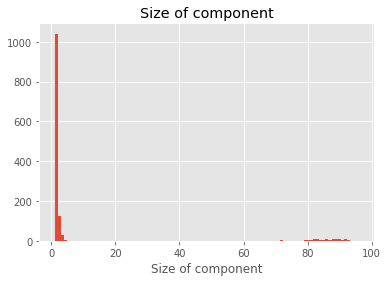

In [5]:
p = 0.5 * np.log(n) / n

components = []

for i in range(100):
    G = nx.gnp_random_graph(n, p)
    components = components + [len(c) for c in cc(G)]

plt.hist(components, bins=100)
plt.title('Size of component')
plt.xlabel('Size of component')
#plt.ylabel('Number of components')
plt.savefig('size_of_components.png', dpi=600)
plt.show()

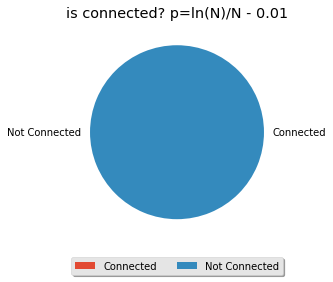

In [16]:
p = np.log(n) / n - 0.01

connected = {
    'True': 0,
    'False': 0
}

for i in range(100):
    G = nx.gnp_random_graph(n, p)
    if nx.algorithms.components.is_connected(G):
        connected['True'] += 1
    else:
        connected['False'] += 1

plt.pie([connected['True'], connected['False']], labels=['Connected', 'Not Connected'])
plt.title('is connected? p=ln(N)/N - 0.01')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.savefig('is_connected_ln_n_minus.png', dpi=600)
plt.show()

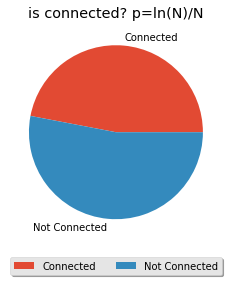

In [17]:
p = np.log(n) / n

connected = {
    'True': 0,
    'False': 0
}

for i in range(100):
    G = nx.gnp_random_graph(n, p)
    if nx.algorithms.components.is_connected(G):
        connected['True'] += 1
    else:
        connected['False'] += 1

plt.pie([connected['True'], connected['False']], labels=['Connected', 'Not Connected'])
plt.title('is connected? p=ln(N)/N')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.savefig('is_connected_ln_n.png', dpi=600)
plt.show()

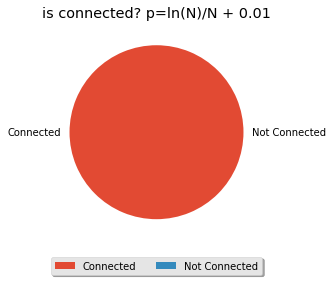

In [18]:
p = np.log(n) / n + 0.01

connected = {
    'True': 0,
    'False': 0
}

for i in range(100):
    G = nx.gnp_random_graph(n, p)
    if nx.algorithms.components.is_connected(G):
        connected['True'] += 1
    else:
        connected['False'] += 1

plt.pie([connected['True'], connected['False']], labels=['Connected', 'Not Connected'])
plt.title('is connected? p=ln(N)/N + 0.01')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.savefig('is_connected_ln_n_plus.png', dpi=600)
plt.show()

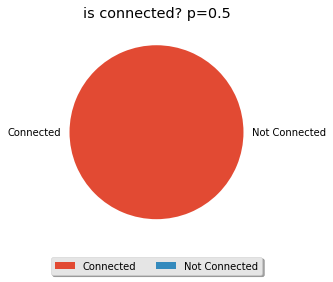

In [7]:
p = 0.5
epsilon = 1

connected = {
    'True': 0,
    'False': 0
}

dim_cliques = []

for i in range(100):
    G = nx.gnp_random_graph(n, p)
    if nx.algorithms.components.is_connected(G):
        connected['True'] += 1
    else:
        connected['False'] += 1
    
    dim_cliques.append(len(list(nx.algorithms.clique.find_cliques(G))[0]))
    
plt.figure()
plt.pie([connected['True'], connected['False']], labels=['Connected', 'Not Connected'])
plt.title('is connected? p=0.5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.savefig('is_connected_05.png', dpi=600)
plt.show()


plt.figure()
hist, bin_edges = np.histogram(dim_cliques)
plt.plot(range(len(dim_cliques)), dim_cliques)
plt.plot(range(len(dim_cliques)), [(2 - epsilon) * np.log(n) for i in range(len(dim_cliques))])
plt.title('Size of cliques')
plt.xlabel('Size of cliques')
plt.savefig('size_cliques.png')
plt.show()

Theorem 2.1

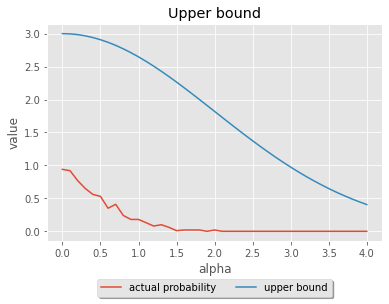

In [9]:
values = []
probabilities = []
mean_theoretical_degree = n*p

for alpha in [i/10 for i in range(41)]:
    G = nx.gnp_random_graph(n, p)

    difference_degrees = []
    count_greater = 0

    for i in range(n):
        temp = np.abs(G.degree[i] - mean_theoretical_degree)
        difference_degrees.append(temp)

        if temp > alpha * np.sqrt(mean_theoretical_degree):
            count_greater += 1

    prob = count_greater / n
    value = 3 * np.exp(- alpha**2 / 8)
    
    probabilities.append(prob)
    values.append(value)
        
plt.plot([i/10 for i in range(41)], probabilities, label='actual probability')
plt.plot([i/10 for i in range(41)], values, label='upper bound')
plt.title('Upper bound')
plt.xlabel('alpha')
plt.ylabel('value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.savefig('verify_upper_bound.png', bbox_inches='tight', dpi=600)
plt.show()

In [3]:
def density_degree_dist_ws(m, K, beta):
    temp = 0
    K_half = K / 2
    beta_half = beta / 2
    K_half_beta = K_half * beta
    f = np.exp(- K_half_beta)
    
    for x in range(int(np.min([m - K_half, K_half]))):
        K_half_minus_x = K_half - x
        m_minus_K_half_minus_x = m - K_half_minus_x
        a = sp.special.binom(K_half, x)
        b = (beta_half)**x
        c = (1 - beta_half)**(K_half_minus_x)
        d = (K_half_beta)**(m_minus_K_half_minus_x)
        e = sp.special.factorial(m_minus_K_half_minus_x)
        temp = temp + a * b * c * d / e
    
    return temp * f

In [4]:
def density(x, m):
    count_x = {}

    for el in x:
        count_x.setdefault(el, 0)
        count_x[el] += 1
    
    density = []
    keys = count_x.keys()
    
    for i in range(1, m + 1):
        if i in keys:
            density.append(count_x[i])
        else:
            density.append(0)

    # return sp.special.softmax(density)
    return density / np.sum(density)

In [5]:
def cosine(m, K, beta, N):
    densities = []
    
    for i in range(1, m + 1):
        densities.append(density_degree_dist_ws(i, K, beta))
    
    degrees = []
    for j in range(1):
        try:
            G = nx.connected_watts_strogatz_graph(N, K, beta)
        except:
            G = nx.connected_watts_strogatz_graph(N, K, beta)
        
        degrees += [val for (node, val) in G.degree()]
    
    degrees = density(degrees, m)
    
    plt.figure()
    plt.plot(densities, label='theorical')
    plt.plot(degrees, label='empirical')
    plt.vlines(K, min(degrees), max(degrees), colors='purple', label='K')
    plt.vlines(np.argmax(densities), min(degrees), max(degrees), colors='cyan', label='max densities')
    plt.vlines(np.argmax(degrees), min(degrees), max(degrees), colors='green', label='max degrees')
    plt.xscale('log')
    # plt.yscale('log')
    plt.title('N=' + str(N) + ', K=' + str(K) + ', beta=' + str(beta))
    plt.xlabel('m')
    plt.ylabel('probability')
    plt.legend()
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    plt.savefig('density_degree_dist_ws_{}_{}_{}.png'.format(N, K, beta), dpi=600)
    plt.show()
    
    print(np.abs(np.argmax(densities) - np.argmax(degrees)), min([np.abs(K - np.argmax(degrees)), np.abs(np.argmax(densities) - K)]))

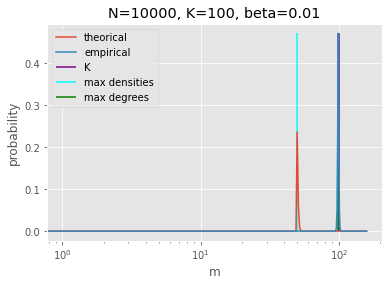

49 1


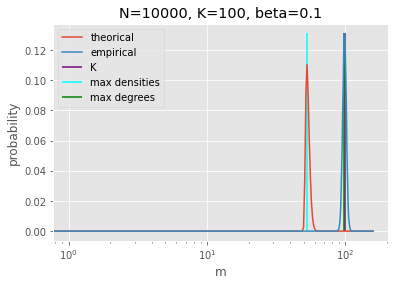

45 2


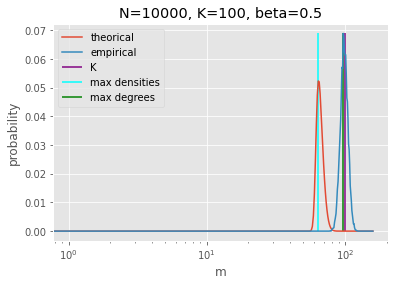

33 3


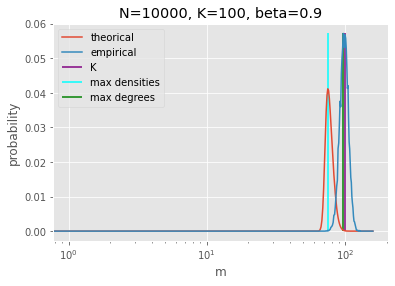

22 3


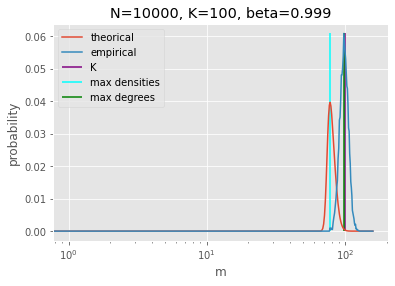

20 2


In [9]:
m = 160

for K in [100]:
    for N in [10000]:
        for beta in [0.01, 0.1, 0.5, 0.9, 0.999]:
            cosine(m, K, beta, N)

In [ ]:
empirical_values = []
N = 1000
K = 100
m = 1

for beta in [i / 1000 for i in range(1, 1000)]:
    if True:
        temp = []

        for j in range(m):
            graph = nx.connected_watts_strogatz_graph(N, K, beta)
            avg_path_length = nx.average_shortest_path_length(graph)
            temp.append(avg_path_length)

        avg_path_length = np.mean(temp)

    empirical_values.append(avg_path_length)

In [ ]:
plt.figure()
plt.plot([i / 1000 for i in range(1, 1000)],
         empirical_values,
         label="empirical")
#plt.plot([i / 1000 for i in range(1, 1000)],
#         [np.log(args.n) / np.log(args.k) for i in range(1, 1000)],
#         label="theoretical beta->0")
#plt.plot([i / 1000 for i in range(1, 1000)],
#         [args.n / (2 * args.k) for i in range(1, 1000)],
#         label="theoretical beta->1")
plt.plot([i / 1000 for i in range(1, 1000)], 
         [(1000 / i) * np.log(N * (i / 1000)) for i in range(1, 1000)], 
         label="approximated theoretical")
#plt.plot(
#    [i / 1000 for i in range(1, 1000)],
#    [((2 * args.n) / args.k) * analytical_path_length(args.n * args.k *
#                                                      (i / 1000) * 0.5)
#     for i in range(1, 1000)],
#    label="analytical theoretical")
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.title(
    'Average shortest path length:' + ' N=' + str(N) + ' - K=' + str(K))
plt.xlabel('beta')
plt.ylabel('Average Shortest Path Length')
plt.savefig('pla_varyingbeta_{}_{}.png'.format(N, K), dpi=600)

In [ ]:
empirical_values = []
N = 1000
K = 100
m = 1

for beta in [i / 1000 for i in range(1, 1000)]:
    if True:
        temp = []

        for j in range(m):
            graph = nx.connected_watts_strogatz_graph(N, K, beta)
            avg_path_length = nx.average_shortest_path_length(graph)
            temp.append(avg_path_length)

        avg_path_length = np.mean(temp)

    empirical_values.append(avg_path_length)

In [ ]:
plt.figure()
plt.plot([i / 1000 for i in range(1, 1000)],
         empirical_values,
         label="empirical")
plt.plot([i / 1000 for i in range(1, 1000)], 
         [(1000 / i) * np.log(N * (i / 1000)) for i in range(1, 1000)], 
         label="approximated theoretical")
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.title(
    'Average shortest path length:' + ' N=' + str(N) + ' - K=' + str(K))
plt.xlabel('beta')
plt.ylabel('Average Shortest Path Length')
plt.savefig('pla_varyingbeta_{}_{}_new.png'.format(N, K), dpi=600)